In [1]:
from localization import pf
import matplotlib.pyplot as plt 

map_path = '/home/tian/mobilerobot_ws/src/localization/localization/test_ipynb/vmegarover_samplemap.pgm'
particle_filter =  pf.ParticleFilter(map_path, 30)

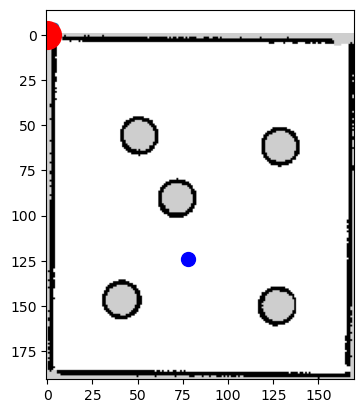

In [2]:
particle_filter.generate_random_sample()

x = [particle_filter.samples[i].state[0] for i in range(len(particle_filter.samples))]
y = [particle_filter.samples[i].state[1] for i in range(len(particle_filter.samples))]

plt.imshow(particle_filter.map.norm_pgm_data, cmap="gray")
plt.plot(particle_filter.map.origin[0], particle_filter.map.origin[1], "ro", markersize = 20)
plt.plot(particle_filter.map.globalFrame_origin_in_in_mapScale_ref_map[0], particle_filter.map.globalFrame_origin_in_in_mapScale_ref_map[1], "bo", markersize = 10)
plt.scatter(x, y)
plt.show()

In [3]:
import numpy as np
particle_filter.raw_lidar_data = np.array([4.5285807,4.5644684,4.545309,4.523108,4.5648813,4.5254126,4.566136
,4.5621233,4.5266128,4.5557194,4.5140753,4.540637,4.5782657,4.5719633
,4.5748734,4.546686,4.503121,4.541605,4.5766907,4.5613384,4.5655394
,4.5520573,4.576231,4.6062202,4.5790544,4.570559,4.5991907,4.588981
,4.5858817,4.629007,4.656323,4.5966697,4.594795,4.583467,4.5962687
,4.634286,4.6338363,4.6370683,4.6629443,4.6444902,4.6319895,4.6887164
,4.6774883,4.6248536,4.6900706,4.70685,4.6993823,4.695973,4.7217445
,4.7411556,4.734129,4.750085,4.743827,4.779825,4.790177,4.775485
,4.7899375,4.7488656,4.8134136,4.836477,4.8392477,4.815701,4.853878
,4.8418627,4.8665624,4.8995247,4.908975,4.874465,4.9217176,4.946888
,5.0096116,4.954474,4.960856,4.955319,5.0098996,5.041956,5.0251336
,5.0558,5.076277,5.1394806,5.1429696,5.135449,5.158274,5.150075
,5.140895,5.2289023,5.2463384,5.2412777,5.2189093,5.229527,5.244448
,5.3398037,5.3318233,5.374134,5.433861,5.375715,5.417917,5.3852086
,5.443244,5.468053,5.4968715,5.5188107,5.5366473,5.568788,5.5586886
,5.6147003,5.632456,5.6523376,5.6599774,5.712742,1.766416,1.7437137
,1.7140055,1.6403008,1.5393001,1.5758116,1.5799059,1.5619035,1.5149394
,1.5741718,1.5710399,1.4926208,1.5003703,1.4764469,1.4933503,1.4799539
,1.453711,1.499894,1.4063337,1.339646,1.4661909,1.439134,1.3852493
,1.4180042,1.4120862,1.4295672,1.381367,1.3982872,1.4045417,1.43273
,1.350392,1.4189683,1.3822225,1.333536,1.4050797,1.392147,1.3749229
,1.3760242,1.4187288,1.3860847,1.3808303,1.3915254,1.3583461,1.3551463
,1.3825285,1.3580763,1.417651,1.3844305,1.4326802,1.3677491,1.4323065
,1.3886179,1.3765813,1.3742026,1.4151274,1.3690059,1.3789161,1.3884945
,1.4293449,1.438727,1.4138308,1.3965507,1.4317125,1.4606968,1.4646821
,1.3991852,1.4264972,1.4646536,1.4657147,1.4582816,1.4934429,1.5221062
,1.4707179,1.5222766,1.52393,1.5850035,1.515635,1.5944457,1.5217658
,1.6036338,1.5454005,1.610019,1.6368638,1.6406121,1.6679603,1.7731911
,6.3229604,6.2546186,6.265976,6.2349706,6.192501,6.201328,6.1989064
,6.203218,6.185163,6.1548815,6.1716523,6.1322584,6.196346,6.154445
,6.133328,6.1615357,6.0921087,6.1005096,6.060367,6.0371513,6.0909
,6.095826,6.01918,6.0438433,6.0049047,5.9778476,6.0198565,6.04377
,5.9426656,5.961169,5.9959817,5.9735556,5.983995,5.8703127,5.946517
,5.965364,5.9449615,5.906873,5.9307795,5.885401,5.879326,5.9584756
,5.9074244,5.8771486,5.8908606,5.8843355,5.8549466,5.8657975,5.928892
,5.899058,5.880164,5.873459,5.873085,5.836611,5.825628,5.856871
,5.8501287,5.8560696,5.8266454,5.8383956,5.897498,5.9043164,5.9230824
,5.908511,5.9212685,5.8486137,5.9132833,5.923659,5.926002,5.882276
,5.924034,5.9174337,5.8987193,5.862022,5.8780546,5.9076023,5.925121
,5.9098954,5.955967,5.9182153,5.93997,5.9834113,5.968562,5.926441
,5.960567,5.92305,6.0007706,6.019784,5.9498053,5.979053,5.9915843
,6.009462,6.0038166,6.075389,6.059134,6.059337,6.067014,6.059537
,6.038209,6.0940843,6.11745,6.100809,6.0823426,6.1212873,6.1292095
,6.092775,6.1695104,6.134465,6.203775,6.179932,6.216212,6.230924
,6.193954,6.1886144,6.3119807,6.2508717,6.2774525,6.328504,6.3340387
,3.288635,3.1788914,3.1732523,3.2209375,3.171253,3.0945704,3.056288
,3.0204828,3.0301785,2.9967573,3.0500157,2.970584,2.9362538,2.9579768
,2.946715,2.9866142,2.9964128,2.9283276,2.9390376,2.9272518,2.9328327
,2.9489422,2.9247274,2.8925197,2.8999887,2.9630775,2.958441,2.9351451
,2.925279,2.9752498,2.9732466,2.9201517,2.9841828,2.9726727,2.9492686
,2.9624057,2.968254,3.0084734,3.0002942,3.071536,3.0578363,3.1247103
,3.0997295,3.1297333,3.236975,3.2688704,3.2599554,5.821074,5.787745
,5.731915,5.653254,5.615079,5.5690203,5.502357,5.4930215,5.485086
,5.4445066,5.38895,5.321677,5.313171,5.3564816,5.266137,5.2475944
,5.2080154,5.1749964,5.1429462,5.0858984,5.083265,5.0889378,5.020243
,5.0020547,4.939975,4.9084754,4.8758326,4.906066,4.8058224,4.7743034
,4.7675195,4.7766204,4.789176,4.670084,4.6585937,4.711691,4.6399474
,4.63491,4.5663967,4.552522,4.580659,4.571637,4.497268,4.4907107
,4.479301,4.453953,4.4052873,4.4023046,4.3792634,4.3467093,4.3355803
,4.383208,4.339325,4.261011,4.3138757,4.281017,4.26585,4.2463493
,4.247532,4.2071514,4.233582,4.2179914,4.1695867,4.1312833,4.1106815
,4.120485,4.0938983,4.1053395,4.1104603,4.0262394,4.0947423,4.045037
,4.0192394,3.9700909,4.092547,3.9774885,3.94073,3.9632638,3.94766
,3.968983,3.9900556,3.955919,3.894853,3.9333591,3.8656154,3.907162
,3.8797944,3.869917,3.8357775,3.8622801,3.880363,3.840367,3.8076203
,3.8744233,3.8335602,3.8153765,3.7915933,3.778782,3.813609,3.7967358
,3.7665653,3.7775276,3.7768984,3.7311983,3.761574,3.7690496,3.7253535
,3.655674,3.7363217,3.7434537,3.7123322,3.6738398,3.7452521,3.6813526
,3.7241678,3.7104156,3.637109,3.747475,3.7248797,3.666636,3.6739888
,3.6819034,3.63969,3.691316,3.6795375,3.643768,3.666388,3.7142756
,3.6724303,3.635793,3.6431124,3.659319,3.6991148,3.6064823,3.621939
,3.640442,3.6738749,3.654263,3.609502,3.5989857,3.6022594,3.6346724
,3.6156058,3.6392956,3.590505,3.614265,3.6263661,3.6279864,3.6186433
,3.613661,3.6443212,3.6278586,3.6307194,3.638829,3.6864133,3.6563914
,3.6751196,3.6483116,3.6693141,3.6517684,3.6595817,3.6307433,3.6873267
,3.678178,3.6449273,3.7070591,3.6461978,3.6661456,3.7249222,3.71008
,3.6972556,3.6805823,3.7121196,3.7438285,3.6460717,3.70305,3.7263112
,3.7481716,3.7434404,3.7121549,3.710872,3.7807035,3.7201831,3.787191
,3.7105231,3.771165,3.8197775,3.8514812,3.7681139,3.7870483,3.8582304
,3.7534823,3.8334014,3.9026084,3.93394,3.7714398,3.860067,3.8352306
,3.8792377,3.8989544,3.8854692,3.9182534,3.903293,3.8964436,4.012675
,3.9007633,3.9744544,3.9708962,3.9494584,3.9135704,3.9891398,4.0032244
,4.061137,4.029154,4.033018,4.0396304,4.0605054,4.0806837,4.095834
,2.0878308,2.050766,2.0023444,1.985843,1.9523046,1.8859671,1.8693669
,1.8904748,1.9158509,1.87129,1.8382853,1.8361039,1.8062724,1.8448462
,1.74247,1.8025335,1.690731,1.7983891,1.7532035,1.7640625,1.7313627
,1.7641363,1.7183065,1.765853,1.6964613,1.7158382,1.7582495,1.7523822
,1.6889828,1.7224842,1.7173342,1.7154804,1.6995978,1.7363989,1.6935323
,1.7312372,1.703983,1.6982013,1.713472,1.6819181,1.6801759,1.743424
,1.7356391,1.6982282,1.7618175,1.7436925,1.7278956,1.7505186,1.7381923
,1.7618953,1.6971227,1.7574191,1.7230952,1.7476928,1.7443938,1.7475489
,1.7693547,1.8386091,1.8378191,1.8542477,1.7626257,1.830082,1.8372614
,1.8984833,1.8651218,1.8502543,1.8697891,1.8709643,1.9713666,1.9761225
,2.007365,2.0324469,2.0752292,4.0780854,4.067517,4.091961,4.0228524
,4.0306673,3.9839563,3.967897,3.8858635,4.0082664,3.9461112,3.8684356
,3.96594,3.922475,3.8586383,3.8099322,3.8042321,3.8008065,3.806439
,3.7938519,3.8320608,3.7748764,3.7648227,3.7114465,3.7520761,3.713612
,3.7126887,3.7047274,3.7312784,3.6959474,3.6927705,3.634784,3.6386788
,3.6822252,3.6333826,3.5825696,3.641179,3.6087615,3.5414414,3.5676997
,3.5751035,3.6032999,3.563364,3.5938241,3.5591235,3.5085254,3.54227
,3.5517535,3.4920256,3.521119,3.551124,3.4924233,3.4433975,3.4612703
,3.5488033,3.5096781,3.4590278,3.4634967,3.4770734,3.4234087,3.4386032
,3.4033592,3.3901315,3.3830762,3.3977816,3.4101913,3.4026787,3.3924885
,3.3800817,3.3750381,3.3952713,3.3345265,3.3113182,3.3808913,3.4040005
,3.3558633,3.3740737,3.2937539,3.36979,3.353932,3.3358133,3.2970374
,3.2648416,3.3394094,3.3120377,3.340492,3.2625513,3.3461952,3.2959538
,3.3220413,3.2950544,3.3013194,3.2959924,3.3004,3.2775006,3.3320987
,3.292096,3.3077452,3.3102636,3.3275793,3.2905443,3.2683256,3.3063405
,3.3306947,3.3091838,3.262062,3.288247,3.3253267,3.3629816,3.334839
,3.285513,3.250521,3.3131542,3.3381114,3.276721,3.3596299,3.3464267
,3.3945231,3.3092194,3.2873054,3.3532467,3.3530798,3.3529437,3.3506315
,3.440705,3.3230505,3.4059825,3.360464,3.3542287,3.3496933,3.3862586
,3.3833323,3.4128,3.3380556,3.441057,3.403713,3.3333058,3.412307
,3.451793,3.3841422,3.4651291,3.4409347,3.4912488,3.388546,3.4864795
,3.448742,3.447199,3.482623,3.5101936,3.5028918,3.45089,3.477529
,3.4795218,3.5171921,3.4781537,3.5167959,3.5684266,3.5803692,3.5335917
,3.5233264,3.5412076,3.5565069,3.4847856,3.5894792,3.5649877,3.5732753
,3.6064758,3.6324167,3.6030354,3.6502063,3.6362178,3.6435654,3.6366498
,3.6868298,3.650583,3.7059968,3.7043045,3.7122948,3.7330458,3.7513618
,3.790647,3.6956184,3.8267038,3.796229,3.737478,3.832864,3.8740838
,3.8295617,3.827382,3.8565402,3.8971906,3.9233756,3.9547777,3.9849532
,3.9252837,4.0052075,4.0297165,4.0350356,4.066128,4.0836596,4.052366
,4.105846,4.1403255,4.149745,4.1545167,4.122834,4.1955075,4.195522
,4.245078,4.2394724,4.2649856,4.28553,4.2960844,4.3509336,4.348669
,4.3537846,4.410779,4.4415107,4.3984804,4.4614553,4.5121355,4.5406804
,4.5853124,4.581457,4.621631,4.6801114,4.6481028,4.694294,4.7413507
,4.77681,4.765591,4.8510494,4.853985,4.83183,4.9467034,4.989228
,4.9881706,5.0439234,5.0620947,5.0576515,5.128962,5.2164,5.2428565
,5.2442307,5.3005834,5.3672423,5.414782,5.4411473,0,0
,0,2.7398355,2.7853968,2.6438107,2.6973617,2.661542,2.5886767
,2.5837238,2.6096432,2.5613081,2.540109,2.5075018,2.4737148,2.4670744
,2.4865363,2.5236962,2.498987,2.4593205,2.4255958,2.515614,2.4168494
,2.448444,2.4340272,2.4947822,2.407989,2.4257724,2.4341831,2.423616
,2.4701467,2.43116,2.3701267,2.4168236,2.397832,2.413705,2.4642107
,2.3665993,2.4280117,2.4466002,2.4978254,2.4738402,2.5151994,2.4957008
,2.502181,2.4428146,2.4756315,2.484915,2.580122,2.5338588,2.6206145
,2.6420515,2.6205456,2.642667,2.7017477,2.7096398,2.8355322,4.753906
,4.6961975,4.7201014,4.6687226,4.7150636,4.685572,4.750321,4.6727047
,4.7496862,4.7013197,4.666459,4.6620717,4.684391,4.695255,4.6747093
,4.66765,4.6393967,4.5897074,4.6352158,4.5980663,4.5834575,4.6138453
,4.5963016,4.629876,4.5907855,4.5694895,4.56787,4.5682583,4.5583916
,4.569879,4.5895734,4.530711,4.550395,4.567453,4.5640855,4.5826473
,4.5961967,4.565673,4.5389633,4.5476937,4.5360093,4.576292]
)

particle_filter.robot_state[0] = 0.6252668045093124
particle_filter.robot_state[1] = 0.0283971337747227
particle_filter.robot_state[2] = 0.0320542
particle_filter.convert_rawLidarData_to_pointCloud()

particle_filter.robot_state[0] = 0.12426279919902984
particle_filter.robot_state[1] = 0.0283971337747227
particle_filter.robot_state[2] = 0.0320542

particle_filter.samples[0].state = particle_filter.robot_state

In [4]:
len(particle_filter.target_point_clouds)

250

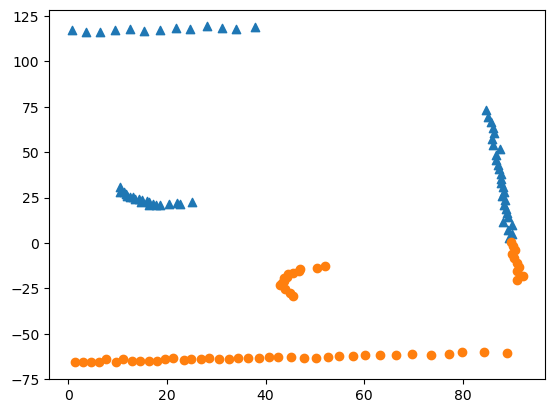

In [5]:
plt.scatter(particle_filter.target_point_clouds[0:62, 0], particle_filter.target_point_clouds[0:62, 1], marker='^')
plt.scatter(particle_filter.target_point_clouds[187:, 0], particle_filter.target_point_clouds[187:, 1], marker='o')

plt.show()

sample 0
[2.45635766 0.56133869]
(2, 205)


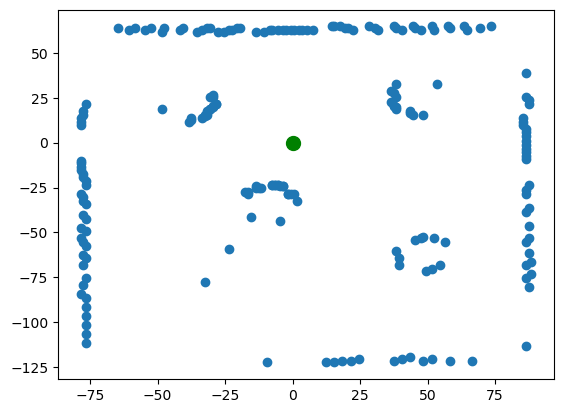

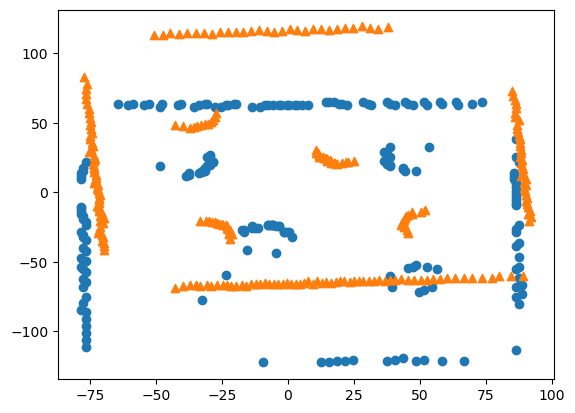

Iteration 0 - Mean Distance: 20.24
Iteration 1 - Mean Distance: 19.96
Iteration 2 - Mean Distance: 19.96
Iteration 3 - Mean Distance: 19.8
Iteration 4 - Mean Distance: 19.43
Iteration 5 - Mean Distance: 19.09
Iteration 6 - Mean Distance: 18.63
Iteration 7 - Mean Distance: 18.0
Iteration 8 - Mean Distance: 17.5
Iteration 9 - Mean Distance: 17.14
sample 1
[ 69.43503422 -82.30862212]
(2, 189)


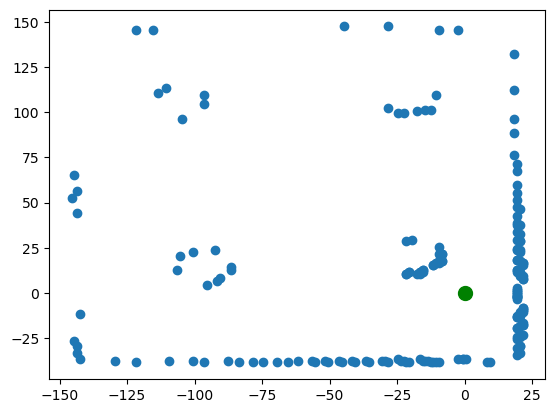

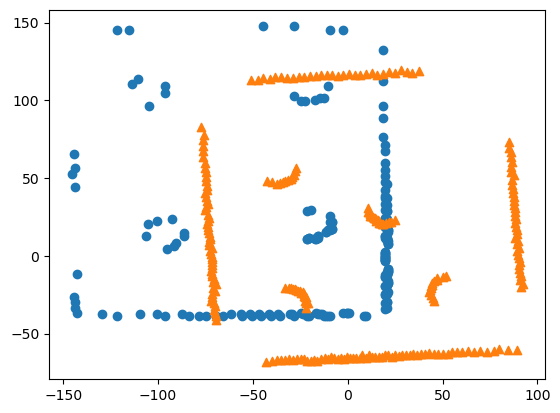

Iteration 0 - Mean Distance: 22.45
Iteration 1 - Mean Distance: 19.32
Iteration 2 - Mean Distance: 17.81
Iteration 3 - Mean Distance: 17.11
Iteration 4 - Mean Distance: 16.78
Iteration 5 - Mean Distance: 16.59
Iteration 6 - Mean Distance: 16.47
Iteration 7 - Mean Distance: 16.24
Iteration 8 - Mean Distance: 16.0
Iteration 9 - Mean Distance: 15.71


In [6]:
particle_filter.localize()